<a href="https://colab.research.google.com/github/MBrandao07/Case_Porto_Seguro_Kaggle/blob/main/Case_Porto_Seguro_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import pod_academy_functions as pod # a biblioteca pod_academy_functions é uma biblioteca com várias funções criada durante o curso da PoD Academy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# verificando todas as funções na biblioteca pod_academy_functions
with open('/content/drive/MyDrive/1 - Aulas PoD Academy/Cientista de Dados POD/Aulas/Case Porto Seguro/pod_academy_functions.py', 'r') as f:
    print(f.read())

# Função para cálculo do Gini normalizado

def gini_normalizado(actual, pred, cmpcol = 0, sortcol = 1):
    import numpy as np
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)

def pod_academy_generate_metadata(dataframe):
    import pandas as pd
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(datafram

In [ ]:
abt_00 = pd.read_csv('/content/drive/MyDrive/1 - Aulas PoD Academy/Cientista de Dados POD/Aulas/Case Porto Seguro/abt_train.csv')
abt_00.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_00.shape

(416648, 57)

In [ ]:
abt_00.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,2.568989,-0.542601,1.695565,1.182765,-0.31183,-0.806035,-0.587823,2.259801,-0.477413,-0.019166,...,0.464250,0.665396,0.896386,-0.373426,0.770766,0.897048,-0.634586,-0.730772,2.350925,0
1,1.561116,-0.542601,-0.527733,1.182765,-0.31183,-0.806035,1.701191,-0.442517,-0.477413,-0.019166,...,-0.367316,1.845816,1.624615,-0.373426,0.770766,0.897048,-0.634586,1.368416,-0.425364,0
2,-0.958565,-0.542601,0.583916,1.182765,-0.31183,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,1.295816,0.665396,0.896386,-0.373426,-1.297410,0.897048,-0.634586,1.368416,-0.425364,0
3,-0.958565,-0.542601,-0.157184,1.182765,-0.31183,1.240641,-0.587823,-0.442517,-0.477413,-0.019166,...,1.295816,0.665396,0.168156,-0.373426,-1.297410,0.897048,-0.634586,1.368416,-0.425364,0
4,-0.454629,-0.542601,-0.898283,-0.845588,-0.31183,-0.806035,-0.587823,-0.442517,2.094620,-0.019166,...,-0.367316,0.665396,-0.924188,-0.373426,0.770766,0.897048,1.575831,1.368416,-0.425364,1


#### Selecionando as features utilizando o RandomForestClassifier

In [ ]:
# dividindo os dados entre variáveis explicativas e target
X = abt_00.drop(axis=1,columns='target')
y = abt_00.target

# treinando o modelo com algoritmo Random Forest
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

Número de features selecionadas:  13


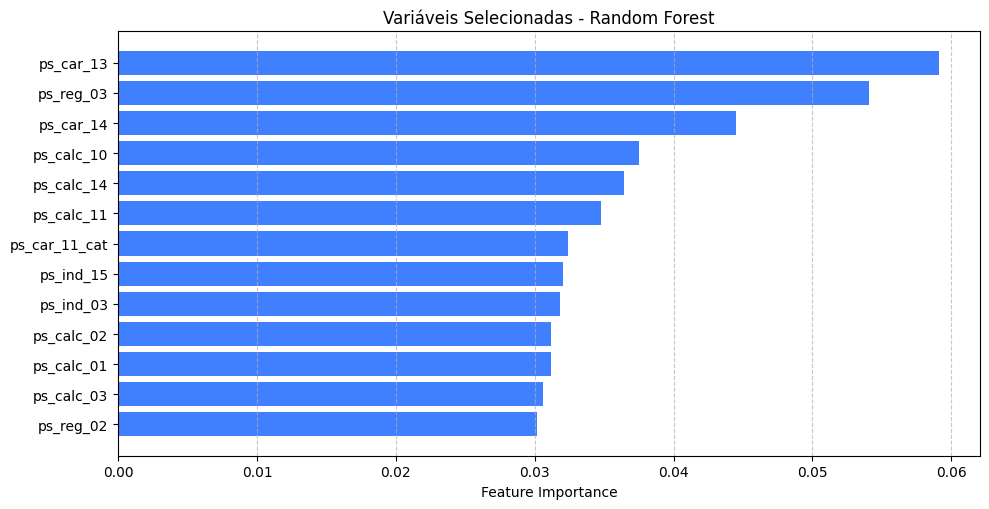

In [ ]:
# obtendo a importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# ordenando as variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# estabelecendo um limite de corte, sendo este limite uma % da importância máxima
cutoff_maximp = 0.5

cutoff = cutoff_maximp * feature_importances.max()

# selecionando as variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# ordenando as variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# filtrando o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# ajustando o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# plotando as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# salvando a lista de variáveis em um arquivo .pkl
import pickle
with open('/content/drive/MyDrive/1 - Aulas PoD Academy/Cientista de Dados POD/Aulas/Case Porto Seguro/prd_list_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [ ]:
# carr5egando a lista de variáveis do arquivo .pkl
with open('/content/drive/MyDrive/1 - Aulas PoD Academy/Cientista de Dados POD/Aulas/Case Porto Seguro/prd_list_features.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['ps_ind_03', 'ps_ind_15', 'ps_reg_02', 'ps_reg_03', 'ps_car_11_cat', 'ps_car_13', 'ps_car_14', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_10', 'ps_calc_11', 'ps_calc_14']


In [ ]:
# criando um df com apenas a variáveis selecionadas e o target
lista_features = loaded_lista + ['target']
abt_01 = abt_00[lista_features]

abt_01.head()

,ps_ind_03,ps_ind_15,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_14,target
0,1.695565,0.761809,2.869279,2.551830e+00,1.265515,3.282777,0.933695,0.870596,1.570820,-0.869620,-0.493106,-0.189128,0.896386,0
1,-0.527733,0.479805,0.149555,-2.906527e-01,0.689777,-0.510640,0.517388,1.567305,0.873885,1.220110,-1.182005,-1.045842,1.624615,0
2,0.583916,-2.058230,2.374783,1.072055e+00,1.265515,-1.087392,0.416784,1.218950,-0.868451,1.220110,1.918039,-0.617485,0.896386,0
3,-0.157184,-0.366207,-0.839435,-3.550803e-16,-0.673815,-0.190735,0.152728,-1.219531,-1.565385,1.220110,0.195793,-0.189128,0.168156,0
4,-0.898283,-0.366207,0.149555,-4.247585e-01,-1.522272,0.075932,-1.134278,1.218950,-0.171516,1.568398,-1.526454,1.095943,-0.924188,1


In [ ]:
# criando o df da base de teste
abt_test = pd.read_csv('/content/drive/MyDrive/1 - Aulas PoD Academy/Cientista de Dados POD/Aulas/Case Porto Seguro/abt_test.csv')
abt_test.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_test.shape

(178564, 57)

In [ ]:
# criando um df de teste com as variáveis selecionadas e o target
lista_features = loaded_lista + ['target']
abt_01_test = abt_test[lista_features]

abt_01_test.head()

,ps_ind_03,ps_ind_15,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_13,ps_car_14,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_10,ps_calc_11,ps_calc_14,target
0,0.213366,0.197801,2.374783,1.516008e+00,-1.401063,-0.963025,-2.787195e-02,-1.567885,-0.519983,-0.869620,-0.493106,0.667586,-1.652418,0
1,2.066114,-0.648211,2.374783,2.891407e+00,1.265515,1.890850,1.621810e+00,-0.522822,1.222352,-0.521332,0.195793,0.239229,-0.924188,0
2,1.695565,0.761809,-0.839435,-3.550803e-16,-0.946533,-1.186010,3.784268e-15,-0.871176,0.525418,-0.521332,1.229141,-1.045842,-0.195959,0
3,0.954465,-1.212218,2.127536,-8.148708e-02,1.053401,0.271939,-1.735980e+00,-0.174467,1.222352,-1.217908,-1.182005,-1.902556,-0.560074,0
4,-0.527733,1.325816,-0.097692,-4.885880e-01,-0.734419,-0.324480,-3.377311e-01,-1.567885,1.222352,1.568398,0.540242,0.239229,-0.560074,0


#### Salvando as abts para treinar os modelos

In [ ]:
abt_01.to_csv('/content/drive/MyDrive/1 - Aulas PoD Academy/Cientista de Dados POD/Aulas/Case Porto Seguro/abt_fs_train.csv')
abt_01_test.to_csv('/content/drive/MyDrive/1 - Aulas PoD Academy/Cientista de Dados POD/Aulas/Case Porto Seguro/abt_fs_test.csv')